<img src="Logo.png" width="100" align="left"/> 

# <center> Unit 3 Project </center>
#  <center> Fourth section : Conclusion </center>


In this notebook you will be comparing the results of the two methods we used on the created testset. That is said: you will compare the results to the clustering with the results of the classification on the same test test and provide insights and explanation about the observed behaviour.

For this final task you will need to : 
1. Load the testset data that you created all along this project 
2. For each cluster provide percentages about each actual/ predicted class contained with this cluster. Eg : cluster N°2 : is made of ( 50% class 2 and 50% class 3 ) from actual labels and ( 40 % predicted class 2 and 40% predicted class 3 + 20% predicted class 1) 
The above is just an example and is far away from the actual situation.

3. Explain the behaviour and provide isights about it 

## 1.  Load the data: 

In [2]:
import pandas as pd 

In [3]:
# To-Do : load the test summary data 
df = pd.read_csv("test_summary.csv")

In [4]:
df.head()

,ID,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,cluster,Category,Predicted_class
0,19,33,0,36.6,57.1,38.9,40.3,24.9,9.62,5.50,112.0,27.6,69.3,3,0,0
1,176,48,0,46.2,59.9,14.6,25.7,5.3,6.93,6.29,66.0,23.4,75.8,3,0,0
2,288,62,0,46.6,98.0,36.7,29.4,7.0,7.56,5.52,70.0,23.1,86.5,3,0,0
3,410,46,1,39.9,71.3,15.4,29.5,4.6,5.95,6.94,72.0,13.4,69.5,3,0,0
4,303,65,0,43.6,104.0,32.3,34.2,7.7,8.23,4.69,89.0,20.8,75.5,3,0,0


## 2. Analysis: 

In [5]:
# To-Do create a summary about each cluster : 
# percentages of each target (actual Category) within each cluster 
# + Percentages of each predicted class within the cluster 
# results should be something like : 
# For clusterk : {'true_class0_percetage': 0.0,
#                 'true_class1_percetage': 0.0,
#                  'true_class2_percetage': 0.0,
#                   'true_class3_percetage': 0.0,
#                   'true_class4_percetage': 0.0,
#                   'predicted_class0_percetage': 0.0,
#                   'predicted_class1_percetage': 0.0,
#                   'predicted_class2_percetage': 0.0,
#                   'predicted_class3_percetage': 0.0,
#                    'predicted_class4_percetage': 0.0}


true_class0_percetage =(df["Category"] == 0 ).sum()*100/df.shape[0]
true_class1_percetage =(df["Category"] == 1 ).sum()*100/df.shape[0]
true_class2_percetage =(df["Category"] == 1 ).sum()*100/df.shape[0]
true_class3_percetage =(df["Category"] == 3 ).sum()*100/df.shape[0]
true_class4_percetage =(df["Category"] == 4 ).sum()*100/df.shape[0]
predicted_class0_percetage =(df["Category"] == 0 ).sum()*100/df.shape[0]
predicted_class1_percetage =(df["Predicted_class"] == 1 ).sum()*100/df.shape[0]
predicted_class2_percetage =(df["Predicted_class"] == 2 ).sum()*100/df.shape[0]
predicted_class3_percetage =(df["Predicted_class"] == 3 ).sum()*100/df.shape[0]
predicted_class4_percetage =(df["Predicted_class"] == 4 ).sum()*100/df.shape[0]
 
print("true : %.4f  predected : %.4f " %(true_class0_percetage,predicted_class0_percetage))
print("true : %.4f  predected : %.4f " %(true_class1_percetage,predicted_class1_percetage))
print("true : %.4f  predected : %.4f " %(true_class2_percetage,predicted_class2_percetage))
print("true : %.4f  predected : %.4f " %(true_class3_percetage,predicted_class3_percetage))
print("true : %.4f  predected : %.4f " %(true_class4_percetage,predicted_class4_percetage))
    

true : 84.5528  predected : 84.5528 
true : 3.2520  predected : 2.4390 
true : 3.2520  predected : 3.2520 
true : 2.4390  predected : 3.2520 
true : 6.5041  predected : 5.6911 


## 3. Explanations and isights :

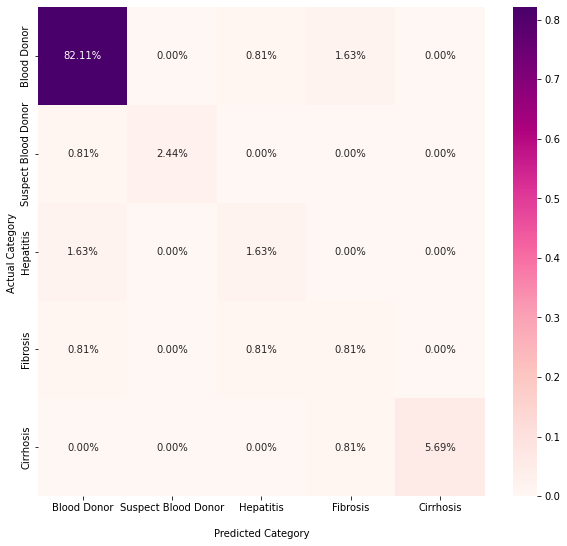

In [92]:
# in this section you should display analysis about each cluster and comment those one by one
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


Cm = cm(df["Category"],df["Predicted_class"])
plt.figure(figsize=(10, 9))
map = sns.heatmap(Cm/np.sum(Cm),  cmap='RdPu' ,annot=True , fmt='.2%')
map.xaxis.set_ticklabels(['Blood Donor','Suspect Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
map.yaxis.set_ticklabels(['Blood Donor','Suspect Blood Donor', 'Hepatitis', 'Fibrosis', 'Cirrhosis'])
map.set_xlabel('\nPredicted Category')
map.set_ylabel('Actual Category ');
plt.show()

## 4. Conclusion:

Explain your findings and provide reasons for the behaviour.

In [ ]:
#we notice that the first classe TP = 82.11% and FN = 2.44% and FP = 3.25% and TN = 12.19 
#while other classes TP are low compared to the first class and TN is higher 
#mainly because the training sat (and the data set in general) has more samples of the first class than the others 
#and this will make the model function poorly whren it comes to other classes predection 
#for ex the TR of the Fibrosis class is .81% while FN = 1.62% , FP = 2.44% and TN = 95.12%...